<a href="https://colab.research.google.com/github/lucasllimati/Bootcamp-Data-Science-Aplicada/blob/main/03_Manipula%C3%A7%C3%A3o_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Caderno de exploração dos dados do datasus 2008 para frente

03.Manipulação de dados

Analisando dados da saúde (DATASUS) com Python e Pandas
Dataset: http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sih/cnv/qiuf.def 

Filtros aplicados:
* Linha: Unidade da Federação
* Coluna: Ano/Mês atendimento
* Conteúdo: Valor total
* Períodos disponíveis: Jan/2008 até Mar/2021


## Produção hospitalar e Pandas

Iremos utilizar a biblioteca **pandas**, essa é uma biblioteca de software criada para a linguagem Python para manipulação e análise de dados. Em particular, oferece estruturas e operações para manipular tabelas numéricas e séries temporais. Também vamos utilizar a biblioteca **Seaborn** é uma biblioteca de visualização de dados do Python baseado no Matplotlib. Ele provê uma interface de alto nível para construção de gráficos estatísticos atrativos e informativos. 

In [1]:
# Importação das bibliotecas
import pandas as pd
import seaborn as sns


1. Ler o arquivo csv.
2. Alterar o enconding para ",", o arquivo que esta separado por ";".
2. Formatar valores para decimais
3. Limpar o arquivo, eliminando as colunas iniciais e finais que não são necessárias. (3 primeiras e 12 ultimas linhas) 



In [2]:
# Limpeza e formatação do dataframe
dados = pd.read_csv("/content/A195723189_28_143_208.csv", encoding="ISO-8859-1", skiprows = 3, sep=";", skipfooter=12, thousands = ".", decimal = ",")

# Exibir os 5 primeiros dados do dataframe
dados.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8327665.97,8431334.62,7251287.20,7490440.60,8957706.45,10993332.84,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,9.964113e+08
1,12 Acre,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3276790.55,2985763.71,2939675.20,2672857.33,2940827.86,3914823.86,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,4.500485e+08
2,13 Amazonas,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14965815.90,15982353.42,15166470.82,14815958.58,16379386.07,19625325.21,18433057.47,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1.917248e+09
3,14 Roraima,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161.35,2841587.97,3328230.63,2878691.04,2964324.32,2524712.40,2462451.64,2662240.18,2499996.16,2846135.56,2789823.29,2839389.53,2647540.20,2865777.71,3181321.82,3070436.96,3162342.44,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2306119.95,2921522.16,3300012.98,3192075.41,3262354.34,2978629.22,3313296.78,3527263.23,3125021.90,3209323.68,3044798.77,2381844.31,3.288770e+08
4,15 Pará,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,33615836.09,30623491.62,34121931.00,35039954.20,35424611.06,34160283.18,34484949.49,35618364.04,34380916.90,38441090.50,33583538.08,32789354.87,34513534.80,31885919.67,33236155.79,31008924.95,31064106.50,28543179.30,36713929.36,36462011.47,36792954.02,36984314.60,35579251.49,35247659.30,37046350.76,34683341.17,34908420.50,29184688.30,43327731.71,40994545.21,40496349.97,38793393.54,36965951.76,38406616.21,37043032.10,36914437.92,33887773.65,23343222.94,13069564.31,4.705309e+09


In [3]:
# Exibir os 5 últimos dados do dataframe
dados.tail()

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
22,43 Rio Grande do Sul,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,91825671.54,77582012.38,91078325.19,91926773.80,91678131.98,90989887.85,94861008.10,96799643.23,87344269.09,97371100.06,90190767.67,81748880.30,92467100.02,85301000.44,91624338.70,92787953.22,99143937.75,95862593.49,1.030448e+08,98566147.88,94371567.58,96973500.30,91006554.37,88764855.22,97614085.43,85488519.32,84881491.62,76806748.32,87777332.11,96799361.58,1.085365e+08,1.117623e+08,1.101079e+08,1.138868e+08,1.167383e+08,1.168340e+08,1.023176e+08,84404640.00,37798832.80,1.276439e+10
23,50 Mato Grosso do Sul,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,16146431.63,14703494.87,16969878.14,17062906.92,17068192.56,17143032.30,17435039.90,18239321.45,16963131.37,17677185.62,16363926.26,16149109.15,16902636.63,16964922.58,17259392.23,18147562.63,19143242.28,17905638.97,1.812695e+07,19217982.14,18904364.43,18812185.96,18316480.80,17844511.04,18654501.49,17877667.41,17395566.03,15854121.13,17502042.14,19724932.28,2.363994e+07,2.260835e+07,2.151915e+07,2.182500e+07,2.141867e+07,2.138701e+07,1.602779e+07,11428462.42,4035989.77,2.324525e+09
24,51 Mato Grosso,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,15578896.35,14592428.67,17252931.32,15921801.14,16732272.17,16075073.71,16479008.11,16011187.69,15357273.96,16834151.93,15474405.82,14234942.30,15055383.98,14478906.98,15976701.25,16026760.63,17304334.81,16131820.19,1.646780e+07,16532335.42,15596133.69,16564324.20,15122951.39,13839763.36,15546808.82,14460507.38,14493916.52,12187688.07,14675991.52,18546814.06,2.068157e+07,2.093614e+07,2.017620e+07,2.038794e+07,1.831662e+07,1.885285e+07,1.589053e+07,13207979.82,8835890.09,2.180120e+09
25,52 Goiás,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,33774725.23,30951957.24,34889685.12,33793945.19,36429187.65,33535245.30,35400045.71,35408697.61,33813397.64,36064816.74,34904539.36,34092381.28,34795831.02,33292972.66,34964737.78,36236325.32,37829806.86,35400944.86,3.650255e+07,38533573.53,36415308.03,37217715.53,36302392.68,34078918.26,36432399.98,34248522.76,34808037.62,28760754.83,35104476.04,38888207.13,4.587133e+07,4.756816e+07,4.795133e+07,4.530484e+07,3.978541e+07,3.761425e+07,3.565589e+07,32253788.65,24867001.02,4.973572e+09
26,53 Distrito Federal,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,18976846.56,18389240.38,19746542.97,19508159.58,19463161.26,18400388.35,18783802.78,20291741.30,19388061.07,19677470.12,18397893.23,17564774.75,19662949.33,18270823.61,20046081.24,20602037.52,21101108.01,19361819.39,2.151493e+07,21133361.51,20963621.60,21333585.20,19617400.92,19207148.01,20429251.56,18249176.79,19623112.14,18164306.94,21657768.52,25045580.62,2.642848e+07,2.387530e+07,2.177187e+07,2.308759e+07,2.066853e+07,2.255203e+07,2.257387e+07,19004029.87,14731938.43,2.592423e+09


In [4]:
# Informações do dataframe
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 287 entries, Unidade da Federação to Total
dtypes: float64(165), object(122)
memory usage: 60.7+ KB


In [5]:
# Formatando valor para decimais
pd.options.display.float_format = "{:.2f}".format

In [6]:
# Média mensal
dados.mean()

2007/Ago       304952.77
2007/Set       788145.26
2007/Out      2440162.96
2007/Nov      5517354.05
2007/Dez     12337159.42
                ...     
2020/Dez     53772909.13
2021/Jan     49474107.60
2021/Fev     38992424.23
2021/Mar     24163712.88
Total      6388205992.19
Length: 165, dtype: float64

In [7]:
# Filtrando mês específico
dados["2008/Ago"]

0      2938286.29
1      1886871.84
2      8331763.97
3      1045291.11
4     23259148.28
5      1550340.63
6      5213290.38
7     14609872.57
8     10645917.52
9     29304821.51
10    10812840.19
11    12673774.35
12    31705296.79
13     9262767.68
14     4543252.50
15    43254543.33
16    80374117.08
17    12384068.19
18    42500830.29
19   180005050.15
20    56699001.13
21    28887854.62
22    56233758.74
23     9602843.49
24     8987811.95
25    21054991.27
26    11548451.89
Name: 2008/Ago, dtype: float64

In [8]:
# Média do mês Janeiro 2008
dados["2008/Ago"].mean()

26641365.101481482

## Visualização e gráficos

Vamos verificar os gastos por estados, considerando o mês Agosto de 2008

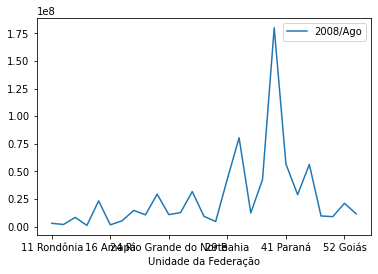

In [9]:
dados.plot(x = "Unidade da Federação", y = "2008/Ago")

A melhor forma de representar esse dado, seria utilizar o gráfico de barras que ira melhoras a vizualização dos gastos pelos estados.




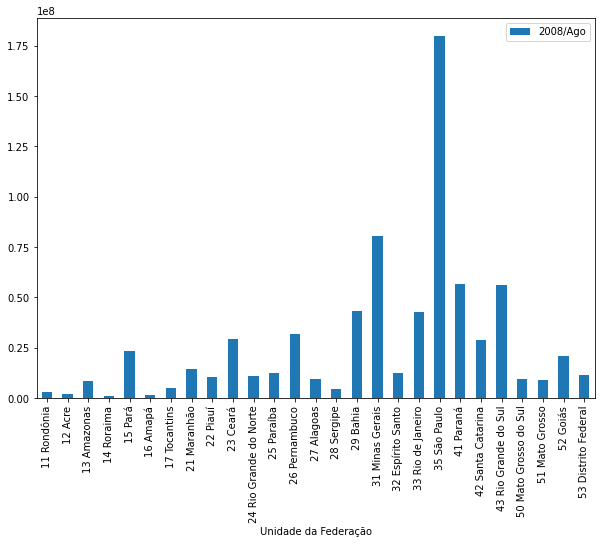

In [10]:
dados.plot(x = "Unidade da Federação", y = "2008/Ago", kind = "bar", figsize=(10 , 7))

Vamos utilizar a biblioteca **Matplotlib**, essa é uma biblioteca de software para criação de gráficos e visualizações de dados em geral, feita para e da linguagem de programação Python e sua extensão de matemática NumPy.

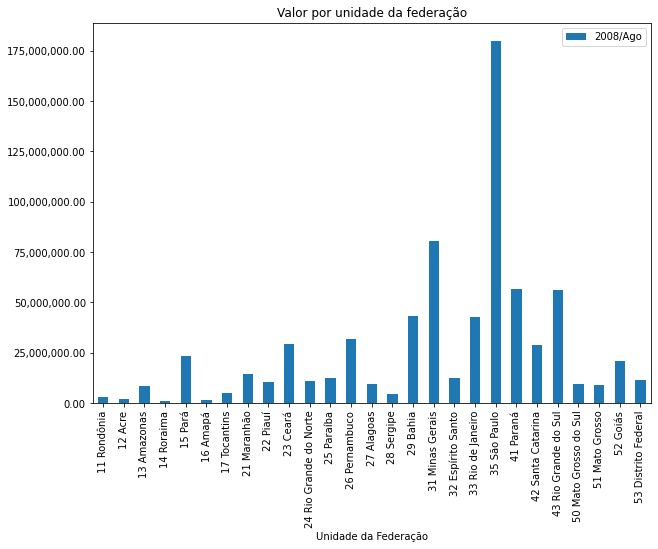

In [11]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

ax = dados.plot(x = "Unidade da Federação", y = "2008/Ago", kind = "bar", figsize=(10 , 7))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

plt.title("Valor por unidade da federação")
plt.show()

In [12]:
dados[["2008/Ago", "2008/Set"]].head()

,2008/Ago,2008/Set
0,2938286.29,2843930.91
1,1886871.84,2084884.80
2,8331763.97,8148089.92
3,1045291.11,1003740.89
4,23259148.28,23667690.01


In [13]:
dados.mean()

2007/Ago       304952.77
2007/Set       788145.26
2007/Out      2440162.96
2007/Nov      5517354.05
2007/Dez     12337159.42
                ...     
2020/Dez     53772909.13
2021/Jan     49474107.60
2021/Fev     38992424.23
2021/Mar     24163712.88
Total      6388205992.19
Length: 165, dtype: float64

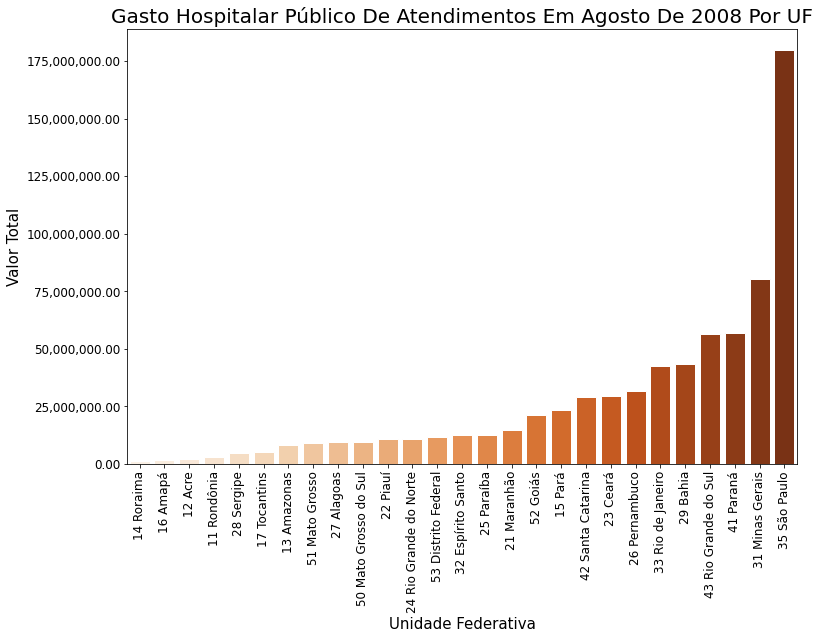

In [14]:
#Criando figura e eixos
fig, ax = plt.subplots(figsize=(12,8)) 

#Mudando o estilo de fundo
sns.set_style('darkgrid')

#Criando o gráfico 
sns.barplot(x='Unidade da Federação', y='2008/Ago', data=dados.sort_values('2008/Ago'), palette='Oranges', ax=ax)

#Plotando as legendas e mudando o tamanho das fontes
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title('Gasto Hospitalar Público De Atendimentos Em Agosto De 2008 Por UF', fontsize=20)
plt.xlabel('Unidade Federativa', fontsize=15)
plt.ylabel('Valor Total', fontsize=15)
plt.xticks( fontsize=12, rotation=90)
plt.yticks(fontsize=12)
    
#Mostrando o gráfico
plt.show()

In [15]:
colunas_usaveis = dados.mean().index
colunas_usaveis

Index(['2007/Ago', '2007/Set', '2007/Out', '2007/Nov', '2007/Dez', '2008/Jan',
       '2008/Fev', '2008/Mar', '2008/Abr', '2008/Mai',
       ...
       '2020/Jul', '2020/Ago', '2020/Set', '2020/Out', '2020/Nov', '2020/Dez',
       '2021/Jan', '2021/Fev', '2021/Mar', 'Total'],
      dtype='object', length=165)

In [16]:
colunas_usaveis = dados.mean().index.tolist()
colunas_usaveis.insert(0, "Unidade da Federação")
colunas_usaveis

['Unidade da Federação',
 '2007/Ago',
 '2007/Set',
 '2007/Out',
 '2007/Nov',
 '2007/Dez',
 '2008/Jan',
 '2008/Fev',
 '2008/Mar',
 '2008/Abr',
 '2008/Mai',
 '2008/Jun',
 '2008/Jul',
 '2008/Ago',
 '2008/Set',
 '2008/Out',
 '2008/Nov',
 '2008/Dez',
 '2009/Jan',
 '2009/Fev',
 '2009/Mar',
 '2009/Abr',
 '2009/Mai',
 '2009/Jun',
 '2009/Jul',
 '2009/Ago',
 '2009/Set',
 '2009/Out',
 '2009/Nov',
 '2009/Dez',
 '2010/Jan',
 '2010/Fev',
 '2010/Mar',
 '2010/Abr',
 '2010/Mai',
 '2010/Jun',
 '2010/Jul',
 '2010/Ago',
 '2010/Set',
 '2010/Out',
 '2010/Nov',
 '2010/Dez',
 '2011/Jan',
 '2011/Fev',
 '2011/Mar',
 '2011/Abr',
 '2011/Mai',
 '2011/Jun',
 '2011/Jul',
 '2011/Ago',
 '2011/Set',
 '2011/Out',
 '2011/Nov',
 '2011/Dez',
 '2012/Jan',
 '2012/Fev',
 '2012/Mar',
 '2012/Abr',
 '2012/Mai',
 '2012/Jun',
 '2012/Jul',
 '2012/Ago',
 '2012/Set',
 '2012/Out',
 '2012/Nov',
 '2012/Dez',
 '2013/Jan',
 '2013/Fev',
 '2013/Mar',
 '2013/Abr',
 '2013/Mai',
 '2013/Jun',
 '2013/Jul',
 '2013/Ago',
 '2013/Set',
 '2013/Out',


In [17]:
usaveis = dados[colunas_usaveis]
usaveis.head()

,Unidade da Federação,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,...,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8327665.97,8431334.62,7251287.20,7490440.60,8957706.45,10993332.84,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,996411254.68
1,12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,...,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3276790.55,2985763.71,2939675.20,2672857.33,2940827.86,3914823.86,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,450048530.47
2,13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,...,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14965815.90,15982353.42,15166470.82,14815958.58,16379386.07,19625325.21,18433057.47,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1917247936.05
3,14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,...,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161.35,2841587.97,3328230.63,2878691.04,2964324.32,2524712.40,2462451.64,2662240.18,24999

In [18]:
usaveis = usaveis.set_index("Unidade da Federação")
usaveis

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8327665.97,8431334.62,7251287.20,7490440.60,8957706.45,10993332.84,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,996411254.68
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3276790.55,2985763.71,2939675.20,2672857.33,2940827.86,3914823.86,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,450048530.47
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14965815.90,15982353.42,15166470.82,14815958.58,16379386.07,19625325.21,18433057.47,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1917247936.05
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2740952.07,2478349.44,

In [19]:
usaveis["2019/Ago"].head()

Unidade da Federação
11 Rondônia    8909111.89
12 Acre        2981072.98
13 Amazonas   16493719.52
14 Roraima     3181321.82
15 Pará       36462011.47
Name: 2019/Ago, dtype: float64

In [20]:
usaveis.loc["12 Acre"]

2007/Ago       10470.07
2007/Set       14001.71
2007/Out       86200.85
2007/Nov      301323.68
2007/Dez      769612.36
               ...     
2020/Dez     3711660.71
2021/Jan     3005561.16
2021/Fev     2272733.90
2021/Mar     1137341.65
Total      450048530.47
Name: 12 Acre, Length: 165, dtype: float64

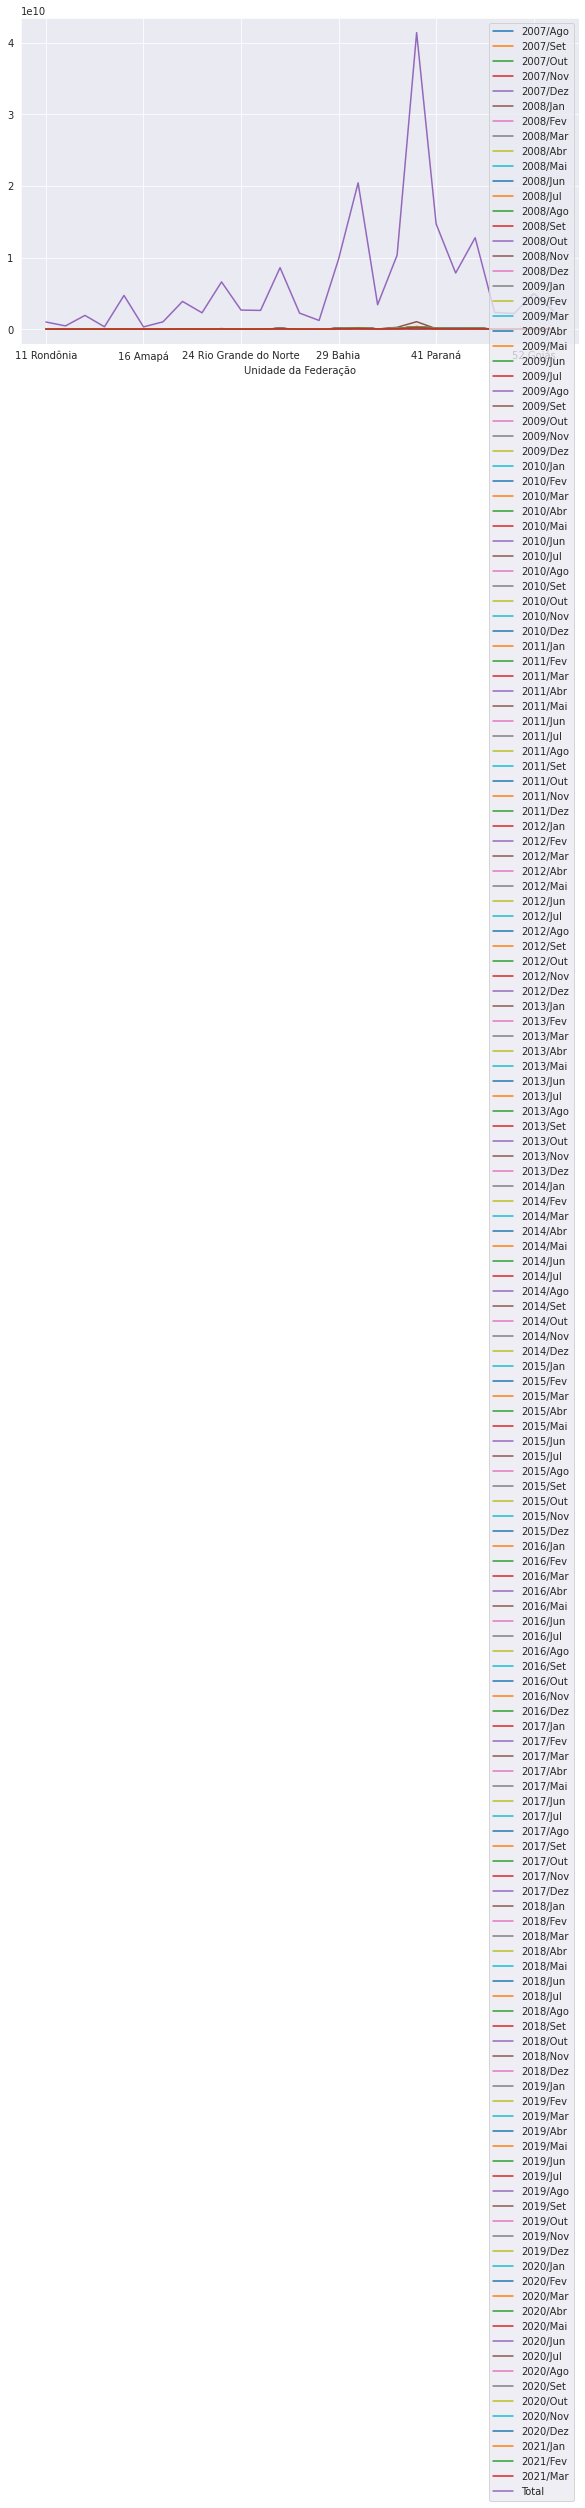

In [21]:
usaveis.plot(figsize=(10,6))
plt.show()

In [22]:
usaveis.T.head()

Unidade da Federação,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará,16 Amapá,17 Tocantins,21 Maranhão,22 Piauí,23 Ceará,24 Rio Grande do Norte,25 Paraíba,26 Pernambuco,27 Alagoas,28 Sergipe,29 Bahia,31 Minas Gerais,32 Espírito Santo,33 Rio de Janeiro,35 São Paulo,41 Paraná,42 Santa Catarina,43 Rio Grande do Sul,50 Mato Grosso do Sul,51 Mato Grosso,52 Goiás,53 Distrito Federal
2007/Ago,4209.37,10470.07,35752.72,4785.91,181159.29,33672.74,4113.76,385330.18,220788.25,357904.65,134605.36,97352.78,400640.85,104243.75,27453.63,135146.36,971394.37,57408.11,469469.34,1665349.90,554800.22,693955.05,1049252.33,199556.12,63562.50,179395.82,191951.47
2007/Set,16397.03,14001.71,45570.64,11858.63,433414.74,104822.98,76633.06,1018352.93,353468.67,572356.18,272088.08,368130.43,1088340.42,174024.90,78565.19,448349.75,2861781.50,284224.80,921646.57,4434168.64,1431708.01,1092964.12,3182913.14,573675.41,232444.62,418053.58,769966.25
2007/Out,133645.19,86200.85,416012.30,43852.67,1893197.50,118378.28,343702.61,2277717.78,1078182.68,1865065.71,684678.30,1002088.64,2973553.48,595544.54,122952.94,1382038.11,10018011.35,1152115.25,2994664.57,14577395.84,4630402.44,3562300.82,8571312.11,1069816.66,927219.59,1198730.25,2165619.56
2007/Nov,346912.84,301323.68,2020381.79,369328.51,5105406.44,226661.18,1068685.94,4334468.23,2406035.32,5131814.39,1695824.89,2149873.40,6699828.82,1125396.73,775705.52,3348779.62,21730281.63,2296383.23,7250528.08,35032259.98,11120030.79,7578502.38,16592432.80,1995899.52,1740439.60,2712117.54,3813256.48
2007/Dez,711758.31,769612.36,5949408.99,470676.43,13162823.43,844019.90,3022200.87,8832514.85,4929772.93,10798042.86,4730811.68,5448177.36,16919031.39,2564966.65,2765495.63,11948984.56,43429517.54,5724199.54,13627123.27,76668547.41,28790722.87,14772555.10,30134255.70,4277979.14,5394225.43,9293914.78,7121965.42


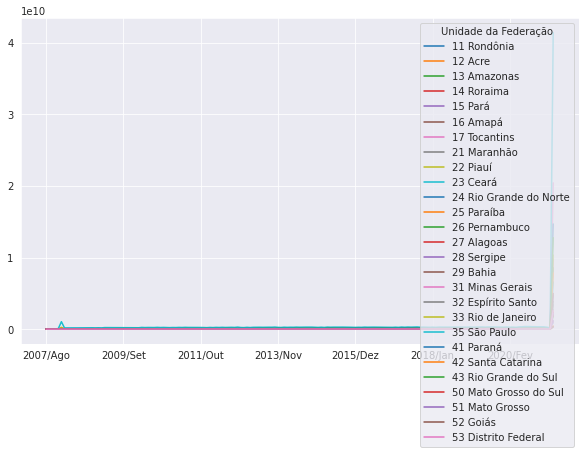

In [23]:
usaveis.T.plot(figsize=(10,6))
plt.show()

In [24]:
usaveis.T.tail()

Unidade da Federação,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará,16 Amapá,17 Tocantins,21 Maranhão,22 Piauí,23 Ceará,24 Rio Grande do Norte,25 Paraíba,26 Pernambuco,27 Alagoas,28 Sergipe,29 Bahia,31 Minas Gerais,32 Espírito Santo,33 Rio de Janeiro,35 São Paulo,41 Paraná,42 Santa Catarina,43 Rio Grande do Sul,50 Mato Grosso do Sul,51 Mato Grosso,52 Goiás,53 Distrito Federal
2020/Dez,9003402.23,3711660.71,21546059.48,3125021.90,36914437.92,2826612.42,689383.43,30927070.93,19352220.14,50271552.33,27277816.41,20355212.85,77877186.72,17462663.52,10997949.03,83131785.74,166376967.67,40500910.57,90567351.87,326846228.95,122146256.92,72720675.11,116833971.73,21387005.58,18852854.81,37614253.55,22552034.04
2021/Jan,8414690.60,3005561.16,24439059.57,3209323.68,33887773.65,2513766.36,347626.85,26797697.76,18437275.64,43743425.74,23228004.80,20149018.68,76810042.34,16496784.27,7149727.62,70325599.07,155064483.25,33767261.13,87201907.99,324115425.70,106948897.53,57281832.19,102317646.36,16027788.65,15890528.31,35655886.73,22573869.50
2021/Fev,6039419.59,2272733.90,13679358.06,3044798.77,23343222.94,1534733.18,416534.32,23260245.95,13636005.36,30186951.00,18186942.80,16996494.03,62259409.32,12792571.64,4129845.36,55544579.04,119877417.15,25669612.63,60873103.08,268193064.06,83130175.37,47429335.91,84404640.00,11428462.42,13207979.82,32253788.65,19004029.87
2021/Mar,4732441.04,1137341.65,6799060.80,2381844.31,13069564.31,989155.40,928756.84,17294509.11,9542151.53,17173151.55,8733455.36,12517894.05,39472738.81,8180887.21,3081081.42,31314602.44,79780838.00,15606368.11,49149884.48,177408317.71,43480729.07,19375822.56,37798832.80,4035989.77,8835890.09,24867001.02,14731938.43
Total,996411254.68,450048530.47,1917247936.05,328876965.09,4705309002.29,309860092.59,1020028272.64,3871069498.04,2280888802.74,6591836650.18,2660122027.15,2614919044.63,8581189975.91,2236415402.51,1215853015.00,9791541570.52,20418737536.66,3405850698.58,10337389922.09,41396408548.81,14681514706.67,7835011163.40,12764391179.92,2324525096.33,2180119781.15,4973572261.43,2592422853.56


In [25]:
# {axis = 1} -> remove a linha cujo indice chama-se TOTAL
usaveis = usaveis.drop("Total", axis = 1)
usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8327665.97,8431334.62,7251287.20,7490440.60,8957706.45,10993332.84,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3276790.55,2985763.71,2939675.20,2672857.33,2940827.86,3914823.86,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14965815.90,15982353.42,15166470.82,14815958.58,16379386.07,19625325.21,18433057.47,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2688315.70,2740952.07,247

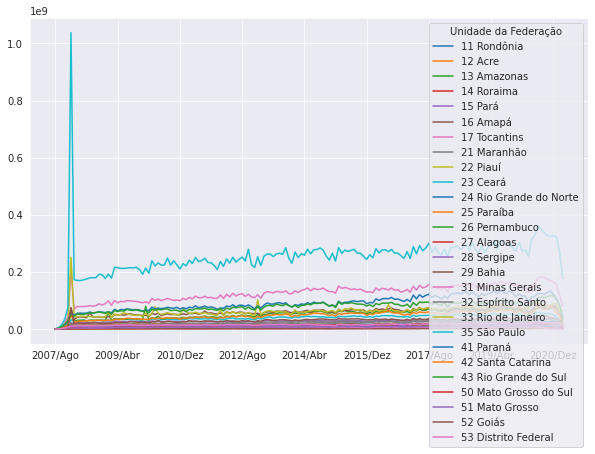

In [26]:
usaveis.T.plot(figsize=(10,6))
plt.show()

## Desafio 01: Reposicionar a legenda do gráfico em uma posição mais adequada. (Dentro, fora, onde? )

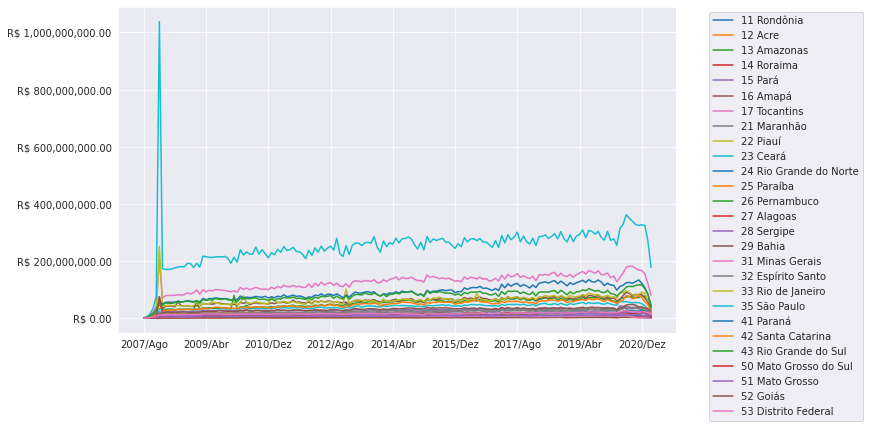

In [27]:
ax = usaveis.T.plot(figsize=(10,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2f}"))

#Justando a legenda para o lado
ax.legend(bbox_to_anchor=(1.05, 1))
plt.show()

## Desafio 02: Plotar o gráfico de linha com 5 estados de sua preferência

---



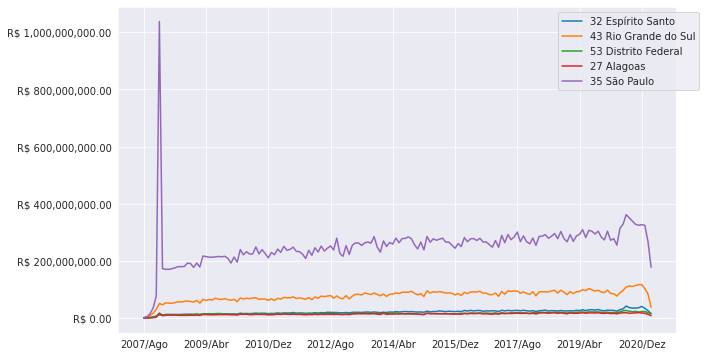

In [28]:
#usei o .sample(n = 5) para retornar 5 valores aleatorios
ax = usaveis.sample(n = 5).T.plot(figsize=(10,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2f}"))
ax.legend(bbox_to_anchor=(1.05, 1))
plt.show()

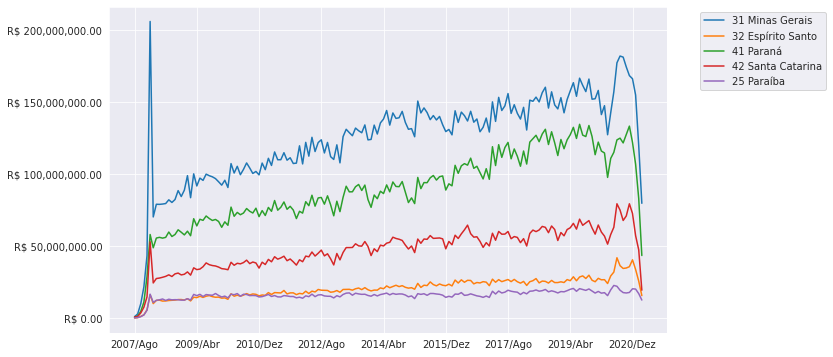

In [29]:
#usei o .loc para mostrar 5 estados especificos
ax = usaveis.loc[["31 Minas Gerais", "32 Espírito Santo", "41 Paraná", "42 Santa Catarina", "25 Paraíba"]].T.plot(figsize=(10,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2f}"))
ax.legend(bbox_to_anchor=(1.05, 1))
plt.show()

### Outras análises - baseados em outras alunos

In [30]:
col_preenchidas = dados.mean().index
col_preenchidas = col_preenchidas.insert(0, 'Unidade da Federação')
filtrados = dados[col_preenchidas]
filtrados.head()

,Unidade da Federação,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,...,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8327665.97,8431334.62,7251287.20,7490440.60,8957706.45,10993332.84,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,996411254.68
1,12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,...,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3276790.55,2985763.71,2939675.20,2672857.33,2940827.86,3914823.86,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,450048530.47
2,13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,...,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14965815.90,15982353.42,15166470.82,14815958.58,16379386.07,19625325.21,18433057.47,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1917247936.05
3,14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,...,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161.35,2841587.97,3328230.63,2878691.04,2964324.32,2524712.40,2462451.64,2662240.18,24999

In [31]:
filtrados.set_index('Unidade da Federação', inplace=True)

In [32]:
filtrados.drop('Total', axis=1, inplace=True)
filtrados.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8327665.97,8431334.62,7251287.20,7490440.60,8957706.45,10993332.84,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3276790.55,2985763.71,2939675.20,2672857.33,2940827.86,3914823.86,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14965815.90,15982353.42,15166470.82,14815958.58,16379386.07,19625325.21,18433057.47,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2688315.70,2740952.07,247

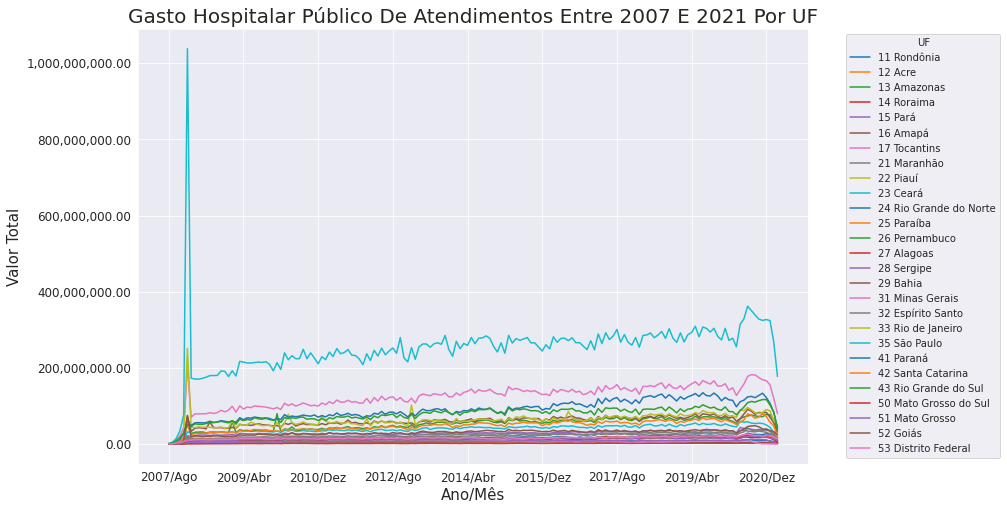

In [33]:

#Criando figura e eixos
fig, ax = plt.subplots(figsize=(12,8)) 

#Mudando o estilo de fundo
sns.set_style('darkgrid')

#Criando o gráfico 
filtrados.T.plot(ax=ax)

#Plotando as legendas e mudando o tamanho das fontes
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title('Gasto Hospitalar Público De Atendimentos Entre 2007 E 2021 Por UF', fontsize=20)
plt.xlabel('Ano/Mês', fontsize=15)
plt.ylabel('Valor Total', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='UF', bbox_to_anchor=(1.05, 1), loc='upper left')

#Mostrando o gráfico
plt.show()

In [34]:
estados_escolhidos = ["31 Minas Gerais", "32 Espírito Santo", "41 Paraná", "42 Santa Catarina", "25 Paraíba"]

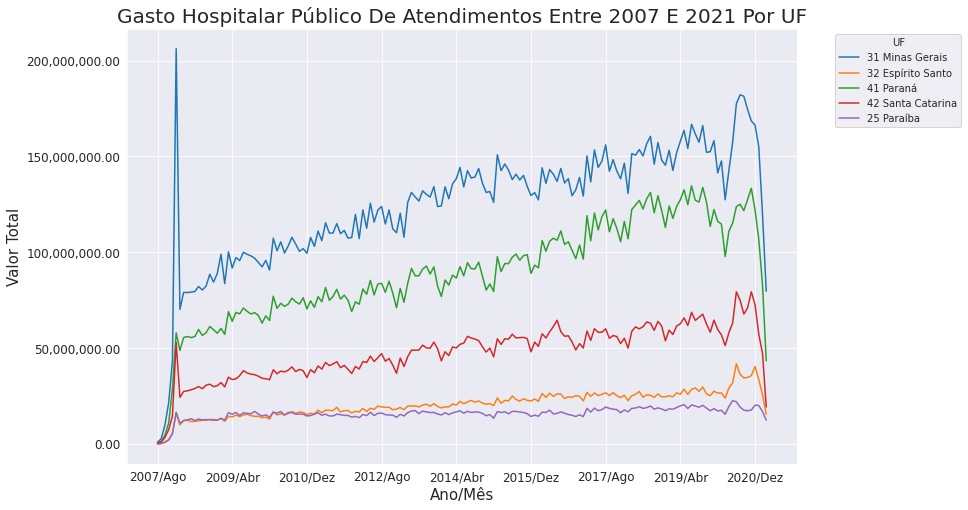

In [35]:
#Criando figura e eixos
fig, ax = plt.subplots(figsize=(12,8)) 

#Mudando o estilo de fundo
sns.set_style('darkgrid')

#Criando o gráfico 
filtrados.loc[estados_escolhidos].T.plot(ax=ax)

#Plotando as legendas e mudando o tamanho das fontes
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title('Gasto Hospitalar Público De Atendimentos Entre 2007 E 2021 Por UF', fontsize=20)
plt.xlabel('Ano/Mês', fontsize=15)
plt.ylabel('Valor Total', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='UF', bbox_to_anchor=(1.05, 1), loc='upper left')

#Mostrando o gráfico
plt.show()

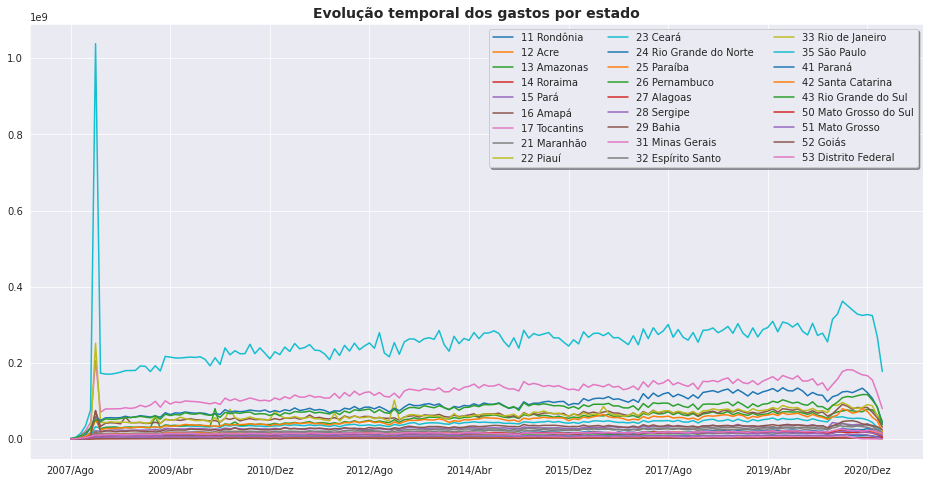

In [36]:
filtrados.T.plot(figsize = (16,8))
plt.style.use('seaborn-dark-palette') #Muda a paleta de cores dos gráficos (dasafio 01 da aula 03)
plt.legend(loc='upper right', ncol=3, shadow=True) #deixar a legenda mais bonita 
plt.title('Evolução temporal dos gastos por estado', fontdict = {"fontsize":14, "fontweight":"bold"})
plt.show()

# Continuação da aula

In [37]:
usaveis

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8327665.97,8431334.62,7251287.20,7490440.60,8957706.45,10993332.84,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3276790.55,2985763.71,2939675.20,2672857.33,2940827.86,3914823.86,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14965815.90,15982353.42,15166470.82,14815958.58,16379386.07,19625325.21,18433057.47,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2688315.70,2740952.07,247

5 Primeiros estados: segue algumas formas para acessar chegar nesse resultado

In [38]:
usaveis.T.columns[:5]

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará'], dtype='object', name='Unidade da Federação')

In [39]:
usaveis.index[:5]

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará'], dtype='object', name='Unidade da Federação')

In [40]:
usaveis[:5]

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8327665.97,8431334.62,7251287.20,7490440.60,8957706.45,10993332.84,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3276790.55,2985763.71,2939675.20,2672857.33,2940827.86,3914823.86,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14965815.90,15982353.42,15166470.82,14815958.58,16379386.07,19625325.21,18433057.47,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2688315.70,2740952.07,247

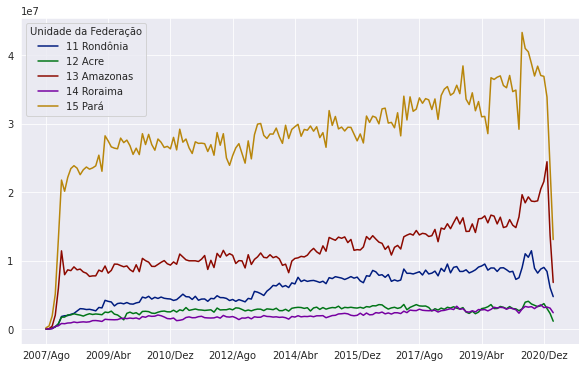

In [41]:
usaveis[:5].T.plot(figsize=(10,6))
plt.show()

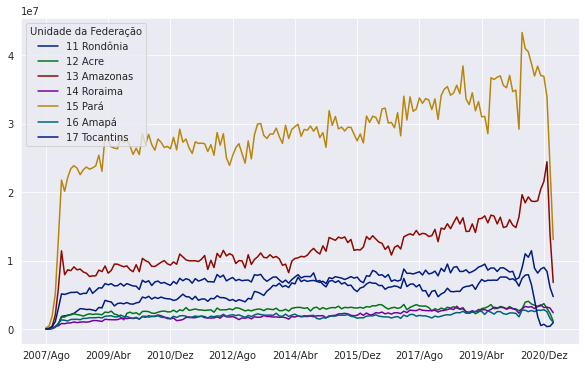

In [42]:
usaveis[:7].T.plot(figsize=(10,6))
plt.show()

sample: Retornar os index aleatórios

In [43]:
import numpy as np

np.random.seed(687942)

usaveis.sample(7)

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
32 Espírito Santo,57408.11,284224.80,1152115.25,2296383.23,5724199.54,16212109.41,10032886.43,12262049.08,12453466.98,11789786.09,11889687.35,12205584.14,12384068.19,12486952.61,12846257.93,12885677.54,12531576.01,13448667.55,11902752.05,14490295.47,14203837.61,15160988.21,14348102.03,15198601.34,15633491.30,14884339.35,14470016.36,14561150.72,13832954.49,14019840.33,13041820.98,16875676.05,15184135.29,15913263.87,15189197.44,15929495.86,17000988.44,16055300.15,16763684.01,16487379.66,...,24276121.39,25480248.19,22686672.67,25266729.61,25975106.39,27444564.56,24444622.13,25716796.37,25498522.61,24338227.14,26158845.99,24671664.41,24683685.86,25201039.31,24710171.75,26740727.97,25983304.03,28690916.87,25936888.97,28550512.79,29318260.49,27519132.91,29788885.15,26294165.36,25250918.87,27615604.26,26601451.82,26689904.87,24003052.09,29290756.45,31958199.08,41931102.65,36405257.36,34491126.71,34800541.67,35708727.33,40500910.57,33767261.13,25669612.63,15606368.11
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,206208080.90,70301089.50,79119005.51,79046322.41,79268070.12,79619189.20,82209206.98,80374117.08,82409129.30,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100258616.86,91831325.37,97289703.07,95723396.53,100050008.70,98977184.26,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100835953.45,105494550.31,99666115.96,103365357.52,107844259.69,104341138.19,100525403.88,101943625.50,...,138366640.55,146510600.58,130734031.29,151506781.86,150702572.27,153604880.55,150262499.13,156721912.31,160484918.69,145998611.06,157294586.62,148172783.99,145422406.28,153236422.57,142690772.52,151976196.81,157957866.20,163641094.76,154174153.49,166775913.85,161774658.77,157437833.94,166165125.18,152171503.07,152473281.15,158265777.55,141463360.42,147654942.70,127447290.37,142746287.34,157276616.50,177466638.10,182176122.99,181422500.43,174585638.28,168564708.16,166376967.67,155064483.25,119877417.15,79780838.00
24 Rio Grande do Norte,134605.36,272088.08,684678.30,1695824.89,4730811.68,11763899.23,9110108.87,10126626.54,10964234.85,11032871.23,10450599.08,11119053.52,10812840.19,11258681.53,10572190.95,10164720.86,10753451.61,10260681.64,10721328.37,12298227.11,11640067.28,12397524.20,12629319.37,13174277.04,12744328.16,13440066.99,13526034.42,13153398.69,12493128.23,12729297.56,11551990.57,15162136.63,13649319.45,14242023.19,12551831.85,13470311.65,14156977.75,13940868.00,13272057.48,13473107.56,...,18118258.43,19045469.42,18254034.58,20972187.31,20717428.90,21991859.64,20909808.17,21544864.14,22634327.48,19926336.21,22290820.67,20445273.59,19382682.35,21161380.30,20770925.83,21775213.78,22206576.63,23819430.58,21613567.61,22137456.57,23073542.40,23438983.02,23086206.33,20354752.02,20140235.98,22205064.78,20518138.12,20939897.73,17722069.48,20430287.05,23027750.86,28608103.39,25721339.11,25098604.18,25257993.78,24312931.74,27277816.41,23228004.80,18186942.80,8733455.36
17 Tocantins,4113.76,76633.06,343702.61,1068685.94,3022200.87,5136474.61,5051932.07,5200151.87,5343714.73,5344487.99,5398413.09,5061461.61,5213290.38,5201400.94,6013071.44,5205114.37,5614918.90,6

In [44]:
usaveis.sample(7)

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
42 Santa Catarina,693955.05,1092964.12,3562300.82,7578502.38,14772555.10,53034384.67,24409572.92,27483480.50,27806641.44,28354279.52,28993292.76,30049455.69,28887854.62,30725718.78,31274395.62,29998635.78,30454606.34,32082203.52,29845655.79,34921069.20,33677499.55,34053483.16,35685005.53,38337704.14,37110055.24,36516827.06,36207968.50,35451417.03,34360136.47,34093173.06,33608566.26,38776130.28,36705001.71,38085803.13,37686277.05,38574085.03,40256188.61,37840220.77,38963855.34,38297339.52,...,52426527.16,55215526.43,50094672.65,58827133.19,61161248.27,60102246.24,61237932.18,63709506.55,63082199.61,59363657.70,64004201.04,61572853.15,53924873.30,59452473.88,57182686.76,61547622.60,62789395.37,65843378.54,61835873.28,68759673.19,64503540.72,66104751.12,67767791.67,62660639.01,58348117.73,64687109.66,59783741.66,56966558.85,51404497.97,58102128.66,63114103.11,79459229.80,75061205.12,67838476.77,70993555.10,79448753.69,72720675.11,57281832.19,47429335.91,19375822.56
33 Rio de Janeiro,469469.34,921646.57,2994664.57,7250528.08,13627123.27,251511992.03,44128159.73,42900847.02,45306499.53,43951349.46,44111107.27,44359056.71,42500830.29,43066461.47,44553314.55,41351511.51,43024756.36,60885459.85,40668378.23,52753544.47,48916675.76,51177398.60,57241944.15,53485657.68,51244087.82,48489476.33,48689069.43,49708372.48,44413423.34,55993709.91,44833345.11,54473238.33,78128632.98,56028875.32,51435826.33,53873907.49,57867285.17,53736019.37,52379338.55,50242531.67,...,67378799.43,72453040.87,65060331.66,74428736.76,74579184.72,79419042.03,75991764.07,77576014.21,78916904.64,72869420.27,79188399.76,74018397.83,70831514.10,79663329.44,74142875.38,75063150.71,76859575.91,82670993.34,78689231.48,88182408.00,83624113.30,81561944.39,82534679.94,74778468.98,75149065.87,80411863.59,73147214.02,74595986.00,69437941.81,89725279.21,88135690.57,95941141.03,89795469.41,81886688.22,80570244.20,82807309.85,90567351.87,87201907.99,60873103.08,49149884.48
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,206208080.90,70301089.50,79119005.51,79046322.41,79268070.12,79619189.20,82209206.98,80374117.08,82409129.30,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100258616.86,91831325.37,97289703.07,95723396.53,100050008.70,98977184.26,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100835953.45,105494550.31,99666115.96,103365357.52,107844259.69,104341138.19,100525403.88,101943625.50,...,138366640.55,146510600.58,130734031.29,151506781.86,150702572.27,153604880.55,150262499.13,156721912.31,160484918.69,145998611.06,157294586.62,148172783.99,145422406.28,153236422.57,142690772.52,151976196.81,157957866.20,163641094.76,154174153.49,166775913.85,161774658.77,157437833.94,166165125.18,152171503.07,152473281.15,158265777.55,141463360.42,147654942.70,127447290.37,142746287.34,157276616.50,177466638.10,182176122.99,181422500.43,174585638.28,168564708.16,166376967.67,155064483.25,119877417.15,79780838.00
35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1038067423.15,172961999.58,170556696.16,170338163.23,172462057.87,175492995.85,179569910.06,180005050.15,180151656.17,191

## Desafio: Adicionar uma coluna mostrando a região de cada estado

In [45]:
usaveis["Total"] = usaveis.sum(axis=1)

In [46]:
usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8327665.97,8431334.62,7251287.20,7490440.60,8957706.45,10993332.84,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,996410650.35
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3276790.55,2985763.71,2939675.20,2672857.33,2940827.86,3914823.86,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,450047246.65
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14965815.90,15982353.42,15166470.82,14815958.58,16379386.07,19625325.21,18433057.47,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1917245104.64
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2740952.07,2478349.44,

In [47]:
lista = usaveis.index
lista

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará',
       '16 Amapá', '17 Tocantins', '21 Maranhão', '22 Piauí', '23 Ceará',
       '24 Rio Grande do Norte', '25 Paraíba', '26 Pernambuco', '27 Alagoas',
       '28 Sergipe', '29 Bahia', '31 Minas Gerais', '32 Espírito Santo',
       '33 Rio de Janeiro', '35 São Paulo', '41 Paraná', '42 Santa Catarina',
       '43 Rio Grande do Sul', '50 Mato Grosso do Sul', '51 Mato Grosso',
       '52 Goiás', '53 Distrito Federal'],
      dtype='object', name='Unidade da Federação')

In [48]:
região = []

for i in lista:    
    if i[0] == '1':        
        região.append('Norte')
        
    if i[0] == '2':        
        região.append('Nordeste')
    
    if i[0] == '3':        
        região.append('Sudeste')
        
    if i[0] == '4':        
        região.append('Sul')
        
    if i[0] == '5':        
        região.append('Centro-Oeste')

usaveis['Região'] = região

In [49]:
usaveis.index.str[0]

Index(['1', '1', '1', '1', '1', '1', '1', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '3', '3', '3', '3', '4', '4', '4', '5', '5', '5', '5'],
      dtype='object', name='Unidade da Federação')

In [50]:
usaveis

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total,Região
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8327665.97,8431334.62,7251287.20,7490440.60,8957706.45,10993332.84,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,996410650.35,Norte
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3276790.55,2985763.71,2939675.20,2672857.33,2940827.86,3914823.86,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,450047246.65,Norte
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14965815.90,15982353.42,15166470.82,14815958.58,16379386.07,19625325.21,18433057.47,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1917245104.64,Norte
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2478349.44,2674958.94,2721261.19,2844811

In [51]:
#ordernando pelo gasto total:

# import matplotlib.pyplot

# a = usaveis.sum(axis=1)
# matplotlib.pyplot.xlabel('Região')
# matplotlib.pyplot.ylabel(a)
# matplotlib.pyplot.show()

In [52]:
usaveis['Região']

Unidade da Federação
11 Rondônia                      Norte
12 Acre                          Norte
13 Amazonas                      Norte
14 Roraima                       Norte
15 Pará                          Norte
16 Amapá                         Norte
17 Tocantins                     Norte
21 Maranhão                   Nordeste
22 Piauí                      Nordeste
23 Ceará                      Nordeste
24 Rio Grande do Norte        Nordeste
25 Paraíba                    Nordeste
26 Pernambuco                 Nordeste
27 Alagoas                    Nordeste
28 Sergipe                    Nordeste
29 Bahia                      Nordeste
31 Minas Gerais                Sudeste
32 Espírito Santo              Sudeste
33 Rio de Janeiro              Sudeste
35 São Paulo                   Sudeste
41 Paraná                          Sul
42 Santa Catarina                  Sul
43 Rio Grande do Sul               Sul
50 Mato Grosso do Sul     Centro-Oeste
51 Mato Grosso            Centro-Oeste
52 G

Vamos ordernar pelo valor total

In [59]:
ordenado_por_total = usaveis.sort_values("Total", ascending = False)
ordenado_por_total = ordenado_por_total.drop(["Total", "Região"], axis = 1)
ordenado_por_total.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1038067423.15,172961999.58,170556696.16,170338163.23,172462057.87,175492995.85,179569910.06,180005050.15,180151656.17,191859884.40,190927266.19,177093923.51,192412059.08,178641284.75,217011730.99,215128107.89,212905217.48,212715455.71,214079357.56,215265625.54,214249871.52,216117145.69,209183971.87,192157037.74,213512793.72,195787926.41,239411372.83,221202929.85,231922777.54,224043808.74,224157730.03,248761855.09,224121038.86,239354185.52,225639053.93,...,259637865.62,279651701.80,254219071.83,285347367.95,286371908.91,291679087.16,279102175.09,286151216.15,295669082.46,277685593.12,302766551.12,278268419.72,266770321.19,291893655.29,268083525.99,287154994.64,292870544.04,309140915.40,281621767.01,307195118.45,303584114.00,294084067.68,303866355.88,282791833.07,273357491.41,303865927.27,272050698.90,277938674.53,255178741.12,314276263.03,328293581.02,361986896.25,350268671.25,338872478.49,328055822.63,324599773.40,326846228.95,324115425.70,268193064.06,177408317.71
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,206208080.90,70301089.50,79119005.51,79046322.41,79268070.12,79619189.20,82209206.98,80374117.08,82409129.30,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100258616.86,91831325.37,97289703.07,95723396.53,100050008.70,98977184.26,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100835953.45,105494550.31,99666115.96,103365357.52,107844259.69,104341138.19,100525403.88,101943625.50,...,138366640.55,146510600.58,130734031.29,151506781.86,150702572.27,153604880.55,150262499.13,156721912.31,160484918.69,145998611.06,157294586.62,148172783.99,145422406.28,153236422.57,142690772.52,151976196.81,157957866.20,163641094.76,154174153.49,166775913.85,161774658.77,157437833.94,166165125.18,152171503.07,152473281.15,158265777.55,141463360.42,147654942.70,127447290.37,142746287.34,157276616.50,177466638.10,182176122.99,181422500.43,174585638.28,168564708.16,166376967.67,155064483.25,119877417.15,79780838.00
41 Paraná,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,58081334.45,48855046.46,55611791.07,56115135.82,55574831.93,56094754.74,59802402.07,56699001.13,58091985.79,61365941.22,59667208.62,57816197.74,60381593.99,57239101.63,69070488.20,64054678.26,68685542.95,67931227.06,70958762.64,69225783.96,67849968.52,68558209.28,67158496.97,63094274.28,66902643.63,64501133.64,77138870.60,70755396.99,73456756.71,71839020.89,73013830.77,76151006.95,74240963.45,73042386.70,76364750.27,...,105558123.29,116133193.49,107075982.24,122331354.51,124731345.17,127083090.02,122616924.02,127991900.80,131257163.40,120647377.43,129530163.96,121810669.26,112984630.73,124159239.68,117715473.32,123907372.22,127464502.39,132608039.80,124865873.14,134708659.18,127174381.95,126203976.57,133870601.68,126221140.81,113573832.72,122330101.96,116125740.39,114776571.27,97784060.57,111012770.38,115203716.64,123856640.55,125089468.62,121771167.11,127506086.52,133443307.36,122146256.92,106948897.53,83130175.37,43480729.07
43 Rio Grande do Sul,1049252.33,3182913.14,8571312.11,16592432.80,30134255.70,51064610.0

In [60]:
ordenado_por_total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, 35 São Paulo to 16 Amapá
Columns: 164 entries, 2007/Ago to 2021/Mar
dtypes: float64(164)
memory usage: 34.8+ KB


In [61]:
ordenado_por_total.describe()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
count,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,...,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00
mean,304952.77,788145.26,2440162.96,5517354.05,12337159.42,76343108.00,23821310.52,25879711.67,26213027.10,26218488.77,26220864.77,27490158.28,26641365.10,27053329.02,28087591.65,27356716.10,26788283.66,30533090.15,26458650.58,32382910.96,30962663.66,31695066.34,31487552.99,32310273.07,32399086.51,31745353.06,31965678.30,31082836.39,29407339.23,33281407.82,28995669.60,35044732.65,33724937.13,34777324.38,32491886.51,33195963.26,35324280.17,33319537.25,33681860.46,32987253.30,...,42387470.64,45755333.61,41045966.40,46835143.56,47249910.28,48436040.55,46408250.32,48106855.46,49364537.15,45767489.64,49626201.30,46136222.83,43916211.60,47730665.50,44646941.39,47357236.98,48447013.99,51167731.55,47445250.42,51590931.80,50462436.60,49368960.54,51085951.39,47606364.58,45844384.35,49518999.38,45205001.63,45486195.75,40600852.14,48849179.54,52131353.07,57693175.63,56199394.29,53909030.54,53910192.75,53735469.44,53772909.13,49474107.60,38992424.23,24163712.88
std,392806.00,1071747.56,3421972.10,7767711.29,16345863.65,201153948.03,34459305.08,34816150.69,34788035.48,35063318.56,35610816.67,37036755.53,36541919.73,36737983.86,39151912.33,38592372.28,36611277.07,40592529.87,36290657.89,44097034.04,43095132.92,43243885.87,43227053.10,43873298.74,43778650.74,43494705.85,43772382.79,42418703.92,39394581.39,44291100.81,39769269.04,48359786.09,45545050.70,47013356.94,45321929.90,45689262.45,50051875.65,45574843.77,47871582.13,45817347.58,...,55044939.55,59294306.76,53582331.55,60628292.20,60976242.70,62043269.26,59775109.91,61633076.49,63466014.55,59000964.76,64241961.66,59488149.27,56845181.78,61971605.94,57162966.13,60972755.50,62455480.96,65791489.93,60598821.71,66094369.88,64550753.98,62703138.07,65133434.08,60483137.07,58458450.86,64131147.43,57501671.81,58751812.68,53110342.12,64042173.55,67175289.93,74371252.47,73093453.56,71118985.61,69373610.63,69068920.54,68845990.27,66840558.46,54697718.60,35701207.83
min,4113.76,11858.63,43852.67,226661.18,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1341532.34,1517391.92,1597811.24,1536941.82,1617781.76,1448489.25,1817004.16,1715762.10,1739371.09,1826492.45,1827433.46,1933782.60,1721224.14,1679410.24,1528245.34,...,1610779.22,1888216.67,1756846.00,1869746.50,2009211.40,2092229.29,2047927.00,2260210.72,2408659.24,2369223.52,2588154.29,2298458.18,2277493.49,2441325.03,2234388.36,2473008.49,2573615.74,2127851.77,2632890.52,2445874.82,2173060.89,2541342.33,2540183.86,2239443.36,2141400.83,2351019.41,2342718.63,2286375.90,1774558.12,2761503.37,2735248.12,2536642.73,2702550.32,2533445.46,1853045.23,509009.74,689383.43,347626.85,416534.32

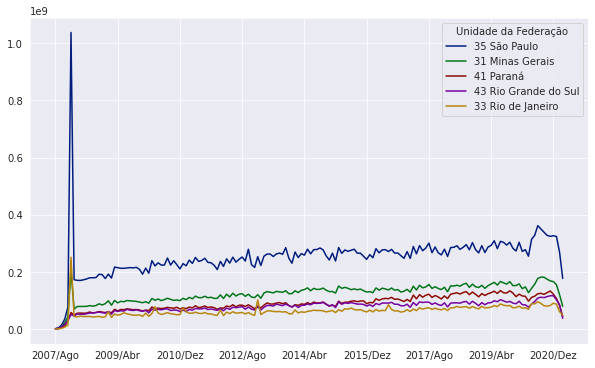

In [62]:
ordenado_por_total.head(5).T.plot(figsize=(10,6))
plt.show()

Vamos remover as 5 primeiras colunas (2007/Ago à 2008/Jan), devido ai pico dos gastos publicos no mês de janeiro. Provavelmente temos esse valor discrepante devido a falta de informações, por esse motivo suponho que foi considerado o mês de Jan/2008 para os dados faltantes (consultas retroativas), ao qual causou esse pico nos gastos públicos, principalmente nos estados SP, RJ e 
MG.

In [67]:
colunas_interessadas = ordenado_por_total.columns[6:]
ordenado_por_total = ordenado_por_total[colunas_interessadas].head()

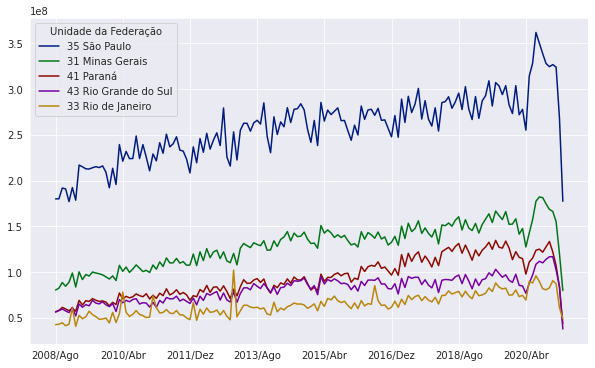

In [68]:
ordenado_por_total.head(5).T.plot(figsize=(10,6))
plt.show()

## Desafio: Deixar o gráfico mais bonito, com a mensagem mais clara.

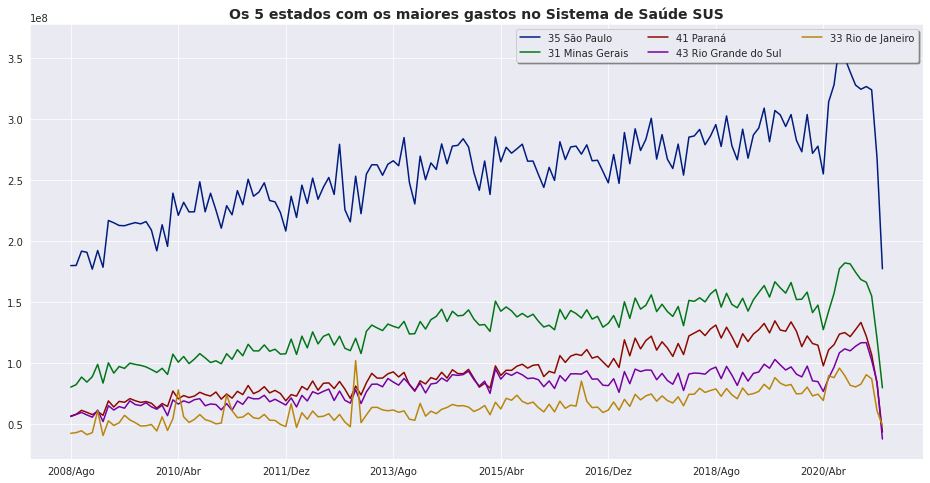

In [70]:
ordenado_por_total.head(5).T.plot(figsize = (16,8))
plt.style.use('seaborn-dark-palette') #Muda a paleta de cores dos gráficos (dasafio 01 da aula 03)
plt.legend(loc='upper right', ncol=3, shadow=True) #deixar a legenda mais bonita 
plt.title('Os 5 estados com os maiores gastos no Sistema de Saúde SUS', fontdict = {"fontsize":14, "fontweight":"bold"})
plt.show()

Outra forma...

In [86]:
usaveis_total = usaveis.sort_values('Total', ascending=False)
usaveis_total = usaveis_total.drop(['Total', 'Regiões', 'Região'], axis=1)
usaveis_total.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1038067423.15,172961999.58,170556696.16,170338163.23,172462057.87,175492995.85,179569910.06,180005050.15,180151656.17,191859884.40,190927266.19,177093923.51,192412059.08,178641284.75,217011730.99,215128107.89,212905217.48,212715455.71,214079357.56,215265625.54,214249871.52,216117145.69,209183971.87,192157037.74,213512793.72,195787926.41,239411372.83,221202929.85,231922777.54,224043808.74,224157730.03,248761855.09,224121038.86,239354185.52,225639053.93,...,259637865.62,279651701.80,254219071.83,285347367.95,286371908.91,291679087.16,279102175.09,286151216.15,295669082.46,277685593.12,302766551.12,278268419.72,266770321.19,291893655.29,268083525.99,287154994.64,292870544.04,309140915.40,281621767.01,307195118.45,303584114.00,294084067.68,303866355.88,282791833.07,273357491.41,303865927.27,272050698.90,277938674.53,255178741.12,314276263.03,328293581.02,361986896.25,350268671.25,338872478.49,328055822.63,324599773.40,326846228.95,324115425.70,268193064.06,177408317.71
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,206208080.90,70301089.50,79119005.51,79046322.41,79268070.12,79619189.20,82209206.98,80374117.08,82409129.30,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100258616.86,91831325.37,97289703.07,95723396.53,100050008.70,98977184.26,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100835953.45,105494550.31,99666115.96,103365357.52,107844259.69,104341138.19,100525403.88,101943625.50,...,138366640.55,146510600.58,130734031.29,151506781.86,150702572.27,153604880.55,150262499.13,156721912.31,160484918.69,145998611.06,157294586.62,148172783.99,145422406.28,153236422.57,142690772.52,151976196.81,157957866.20,163641094.76,154174153.49,166775913.85,161774658.77,157437833.94,166165125.18,152171503.07,152473281.15,158265777.55,141463360.42,147654942.70,127447290.37,142746287.34,157276616.50,177466638.10,182176122.99,181422500.43,174585638.28,168564708.16,166376967.67,155064483.25,119877417.15,79780838.00
41 Paraná,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,58081334.45,48855046.46,55611791.07,56115135.82,55574831.93,56094754.74,59802402.07,56699001.13,58091985.79,61365941.22,59667208.62,57816197.74,60381593.99,57239101.63,69070488.20,64054678.26,68685542.95,67931227.06,70958762.64,69225783.96,67849968.52,68558209.28,67158496.97,63094274.28,66902643.63,64501133.64,77138870.60,70755396.99,73456756.71,71839020.89,73013830.77,76151006.95,74240963.45,73042386.70,76364750.27,...,105558123.29,116133193.49,107075982.24,122331354.51,124731345.17,127083090.02,122616924.02,127991900.80,131257163.40,120647377.43,129530163.96,121810669.26,112984630.73,124159239.68,117715473.32,123907372.22,127464502.39,132608039.80,124865873.14,134708659.18,127174381.95,126203976.57,133870601.68,126221140.81,113573832.72,122330101.96,116125740.39,114776571.27,97784060.57,111012770.38,115203716.64,123856640.55,125089468.62,121771167.11,127506086.52,133443307.36,122146256.92,106948897.53,83130175.37,43480729.07
43 Rio Grande do Sul,1049252.33,3182913.14,8571312.11,16592432.80,30134255.70,51064610.0

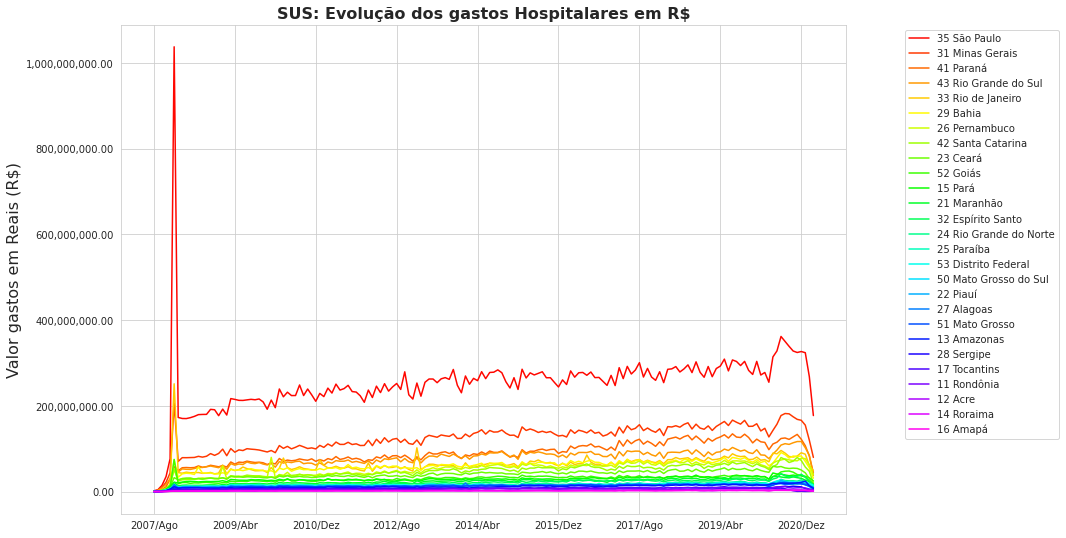

In [92]:
#Criando o gráfico
ax = usaveis_total.T.plot(figsize=(13,9))

#Organizando a legenda e os tickers do eixo y
ax.legend(loc='best', bbox_to_anchor=(0.8, 0.5, 0.5, 0.5))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

#definindo o estido do fundo do gráfico
ax = sns.set_style("whitegrid")

#Editando as legendas
plt.title("SUS: Evolução dos gastos Hospitalares em R$", size=16, weight='bold' )
plt.ylabel("Valor gastos em Reais (R$)", size = 16)

#Plotando a imagem
plt.show()

## Desafio: Adicione o seu estado aos 5 estados existentes e plote

Vamos analisar a região suldeste e adicionar o estado "42 Santa Catarina", para comparar aos demais estados.

In [76]:
usaveis["Região"] == "Sudeste"

Unidade da Federação
11 Rondônia               False
12 Acre                   False
13 Amazonas               False
14 Roraima                False
15 Pará                   False
16 Amapá                  False
17 Tocantins              False
21 Maranhão               False
22 Piauí                  False
23 Ceará                  False
24 Rio Grande do Norte    False
25 Paraíba                False
26 Pernambuco             False
27 Alagoas                False
28 Sergipe                False
29 Bahia                  False
31 Minas Gerais            True
32 Espírito Santo          True
33 Rio de Janeiro          True
35 São Paulo               True
41 Paraná                 False
42 Santa Catarina         False
43 Rio Grande do Sul      False
50 Mato Grosso do Sul     False
51 Mato Grosso            False
52 Goiás                  False
53 Distrito Federal       False
Name: Região, dtype: bool

In [78]:
estados_sudeste = usaveis["Região"] == "Sudeste"
estados_sudeste["42 Santa Catarina"] = True
estados_sudeste

Unidade da Federação
11 Rondônia               False
12 Acre                   False
13 Amazonas               False
14 Roraima                False
15 Pará                   False
16 Amapá                  False
17 Tocantins              False
21 Maranhão               False
22 Piauí                  False
23 Ceará                  False
24 Rio Grande do Norte    False
25 Paraíba                False
26 Pernambuco             False
27 Alagoas                False
28 Sergipe                False
29 Bahia                  False
31 Minas Gerais            True
32 Espírito Santo          True
33 Rio de Janeiro          True
35 São Paulo               True
41 Paraná                 False
42 Santa Catarina          True
43 Rio Grande do Sul      False
50 Mato Grosso do Sul     False
51 Mato Grosso            False
52 Goiás                  False
53 Distrito Federal       False
Name: Região, dtype: bool

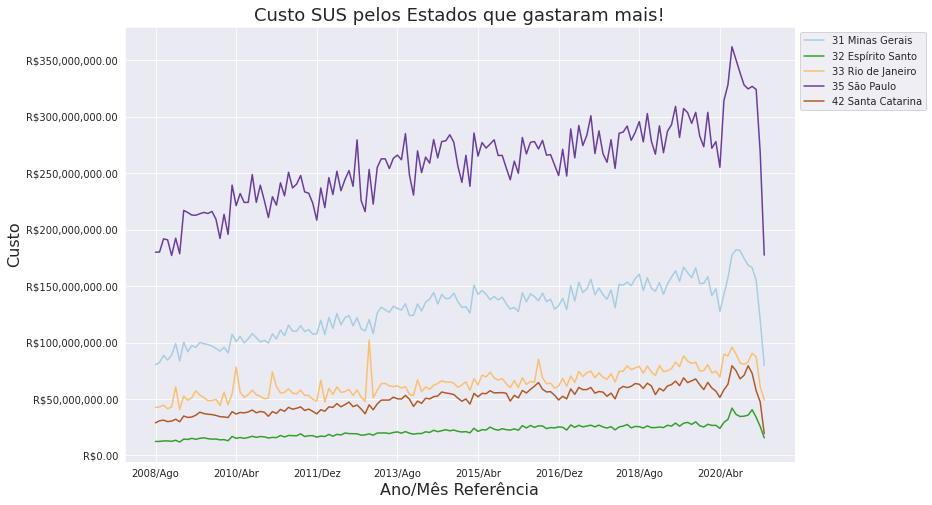

In [79]:
ax = usaveis[colunas_interessadas].loc[estados_sudeste].T.plot(figsize=(12,8), cmap=plt.get_cmap('Paired'))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R${x:,.2f}"))
ax.set_xlabel('Ano/Mês Referência', fontsize=16)
ax.set_ylabel('Custo', fontsize=16)
plt.title('Custo com o sistema SUS - Região sudeste e Santa Catarina!', fontsize=18)
plt.grid(True)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

## Desafio: Googlar os casos de dengue no Brasil e se reflete nos gastos

Segundo o Ministério da saúde a dengue é uma doença que ocorre com mais frequência no verão devido a duas características. Basicamente o aumento do calor e da quantidade de chuvas aumentam a reprodução do **Aedes aegypti**.

Utilizando a plataforma Datasus, também podemos obter as informações de gastos com dengue em processos hospitalares. Muitos estados fornecem informações insuficientes.

## Desafio: Plotar só os estados do suldeste e ver se afetou com um pico em 2012/2013 de forma similar esse estados

In [94]:
estados_sudeste = usaveis["Região"] == "Sudeste"
estados_sudeste

Unidade da Federação
11 Rondônia               False
12 Acre                   False
13 Amazonas               False
14 Roraima                False
15 Pará                   False
16 Amapá                  False
17 Tocantins              False
21 Maranhão               False
22 Piauí                  False
23 Ceará                  False
24 Rio Grande do Norte    False
25 Paraíba                False
26 Pernambuco             False
27 Alagoas                False
28 Sergipe                False
29 Bahia                  False
31 Minas Gerais            True
32 Espírito Santo          True
33 Rio de Janeiro          True
35 São Paulo               True
41 Paraná                 False
42 Santa Catarina         False
43 Rio Grande do Sul      False
50 Mato Grosso do Sul     False
51 Mato Grosso            False
52 Goiás                  False
53 Distrito Federal       False
Name: Região, dtype: bool

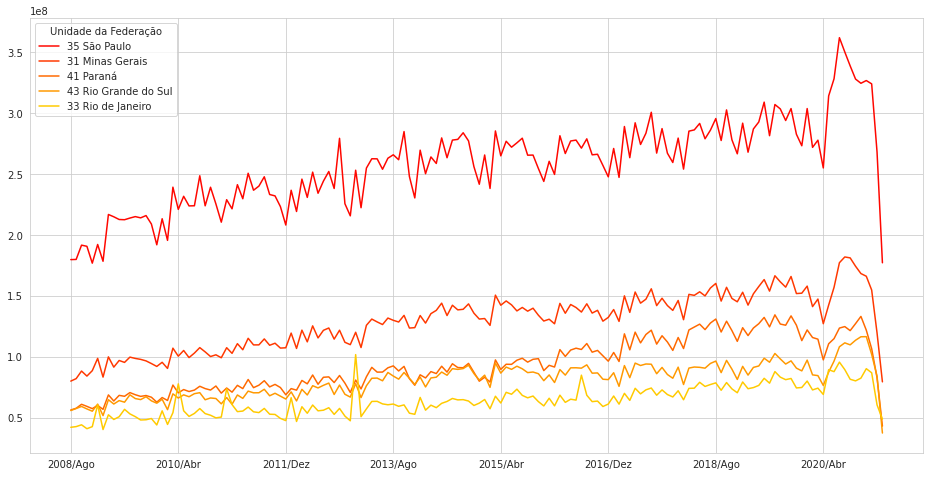

In [98]:
ordenado_por_total.head(5).T.plot(figsize = (16,8))

## Desafio: Adicionar seu estado novamente e deixe o gráfico informativo